In [2]:
# Load the necessary packages and modules
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [12]:
# Simple Moving Average 
def calculate_SMA(data, ndays): 
    SMA = pd.Series(data['Close'].rolling(ndays).mean(), name='SMA') 
    data = data.join(SMA) 
    return data

In [13]:
# Exponentially-weighted Moving Average 
def calculate_EWMA(data, ndays): 
    EMA = pd.Series(data['Close'].ewm(span=ndays, min_periods=ndays - 1).mean(), 
                    name='EWMA_' + str(ndays)) 
    data = data.join(EMA) 
    return data

In [14]:
# Retrieve the Goolge stock data from Yahoo finance
data = yf.download('GOOGL', start="2020-01-01", end="2024-12-31")
close = data['Close']
close.tail()

[*********************100%%**********************]  1 of 1 completed


Date
2024-07-05    190.600006
2024-07-08    189.029999
2024-07-09    188.979996
2024-07-10    191.179993
2024-07-11    185.570007
Name: Close, dtype: float64

In [15]:
# Compute the 50-day SMA
n = 50
data_with_sma = calculate_SMA(data, n)
sma = data_with_sma.dropna(subset=['SMA'])['SMA']

In [16]:
# Compute the 200-day EWMA
ew = 200
data_with_ewma = calculate_EWMA(data, ew)
ewma = data_with_ewma.dropna(subset=['EWMA_200'])['EWMA_200']

In [17]:
# Plotting the Google stock Price Series chart and Moving Averages below
plt.figure(figsize=(10,7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

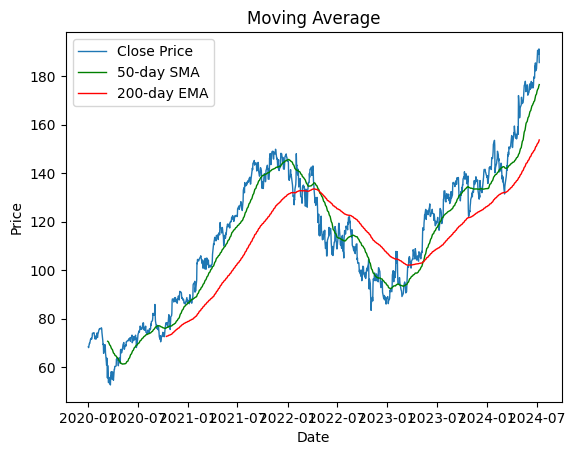

In [20]:
# Set the title and axis labels
plt.title('Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')

# Plot close price and moving averages
plt.plot(data['Close'], lw=1, label='Close Price')
plt.plot(sma, 'g', lw=1, label='50-day SMA')
plt.plot(ewma, 'r', lw=1, label='200-day EMA')

# Add a legend to the axis
plt.legend()

plt.show();